#Performing EDA on the Data
Dataset Source: https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data?resource=download

In [1]:
# Downloading the dataset from google drive.
!gdown https://drive.google.com/file/d/1-1ObqZNM9crJSBoCgKTSJXqmYy4hyA-a/view?usp=sharing --fuzzy

# Downloading the custom font from google drive.
!gdown https://drive.google.com/file/d/1-2Ina4oKZA5kbm-bTJ6A137F1h7RfXw-/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1-1ObqZNM9crJSBoCgKTSJXqmYy4hyA-a
To: /content/MYRIADPRO-COND.OTF
100% 92.0k/92.0k [00:00<00:00, 99.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-2Ina4oKZA5kbm-bTJ6A137F1h7RfXw-
To: /content/insurance_claims.csv
100% 267k/267k [00:00<00:00, 119MB/s]


In [2]:
import pandas as pd

insurance_claims_df = pd.read_csv('insurance_claims.csv')
insurance_claims_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
# Column _c39 is full of null values, so I'm removing it.
insurance_claims_df = insurance_claims_df.drop('_c39', axis=1)

In [4]:
import numpy as np

# No null values--however there are values where it is a "?"".
# Replacing "?" with null values.
insurance_claims_df = insurance_claims_df.replace('?', np.NaN)
insurance_claims_df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [5]:
# Perform mode imputation on columns with null values.
insurance_claims_df = insurance_claims_df.fillna(insurance_claims_df.mode().iloc[0])
insurance_claims_df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [6]:
insurance_claims_df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
# Let's see how many of each classes we have for Fraud Reported.

print(f"Fradulent: {(insurance_claims_df['fraud_reported'] == 'Y').sum()} \n"
      f"Non-Fradulent: {(insurance_claims_df['fraud_reported'] == 'N').sum()}")

# The data is imbalanced.

Fradulent: 247 
Non-Fradulent: 753


# Setting up Custom Font

In [8]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = 'MYRIADPRO-COND.OTF'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

# Graphing using Matplotlib

<BarContainer object of 2 artists>

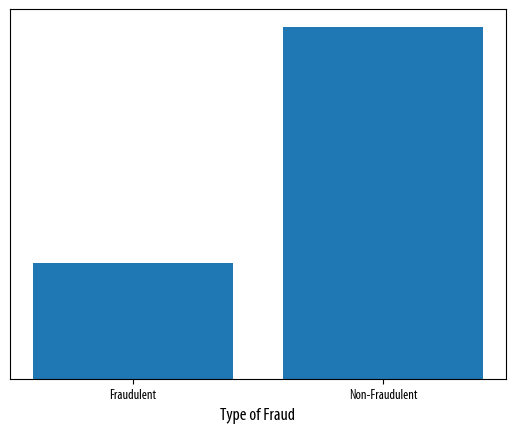

In [9]:
import matplotlib.pyplot as plt

x_axis = ['Fraudulent', 'Non-Fraudulent']
y_axis = [247, 753]

ax = plt.gca()
ax.get_yaxis().set_visible(False)

plt.xlabel('Type of Fraud', fontweight='bold', fontsize = 13.0)

plt.bar(x_axis, y_axis)

In [10]:
# Let's see what the gender is for the fradulent and non-fradulent.

print(f"Fraudulent Females: {((insurance_claims_df['fraud_reported'] == 'Y') & (insurance_claims_df['insured_sex'] == 'FEMALE')).sum()} \n"
      f"Non-fraudulent Females: {((insurance_claims_df['fraud_reported'] == 'N') & (insurance_claims_df['insured_sex'] == 'FEMALE')).sum()}\n"
      f"Fraudulent Males: {((insurance_claims_df['fraud_reported'] == 'Y') & (insurance_claims_df['insured_sex'] == 'MALE')).sum()}\n"
      f"Non-fraudulent Males: {((insurance_claims_df['fraud_reported'] == 'N') & (insurance_claims_df['insured_sex'] == 'MALE')).sum()}")

Fraudulent Females: 126 
Non-fraudulent Females: 411
Fraudulent Males: 121
Non-fraudulent Males: 342


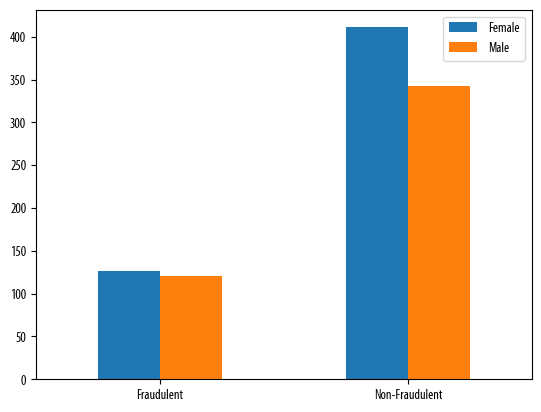

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = ['Fraudulent','Non-Fraudulent']
Y = [126,411]
Z = [121,342]

df = pd.DataFrame(np.c_[Y,Z], index=X)
df.plot.bar(rot=0)
plt.legend(["Female", "Male"]);

plt.show()


<BarContainer object of 2 artists>

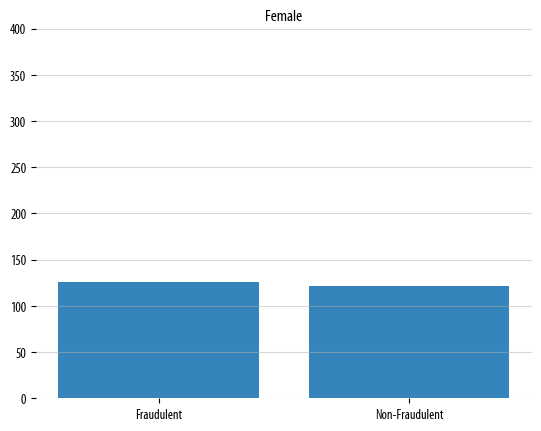

In [13]:
import matplotlib.pyplot as plt

x_axis = ['Fraudulent', 'Non-Fraudulent']
y_axis = [126, 121]

ax = plt.gca()
ax.set(ylim=(0, 400))

plt.grid(axis = 'y', alpha = 0.5)

plt.box(False)
plt.title("Female")
plt.bar(x_axis, y_axis, alpha = 0.9)

<BarContainer object of 2 artists>

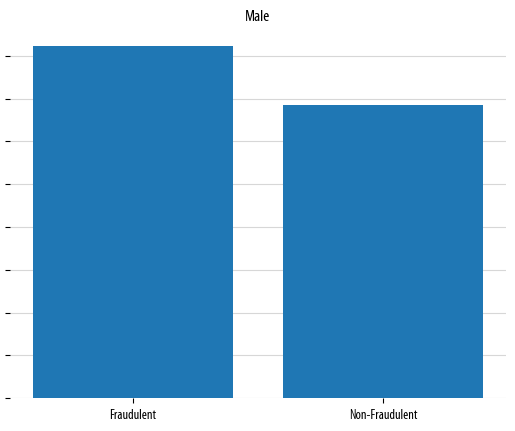

In [14]:
import matplotlib.pyplot as plt

x_axis = ['Fraudulent', 'Non-Fraudulent']
y_axis = [411, 342]

ax = plt.gca()
ax.set_frame_on(False)
ax.set_yticklabels([])

ax.set_axisbelow(True) # Hides the x-axis grid lines.

plt.grid(axis = 'y', alpha = 0.5)
plt.title("Male")
plt.bar(x_axis, y_axis)

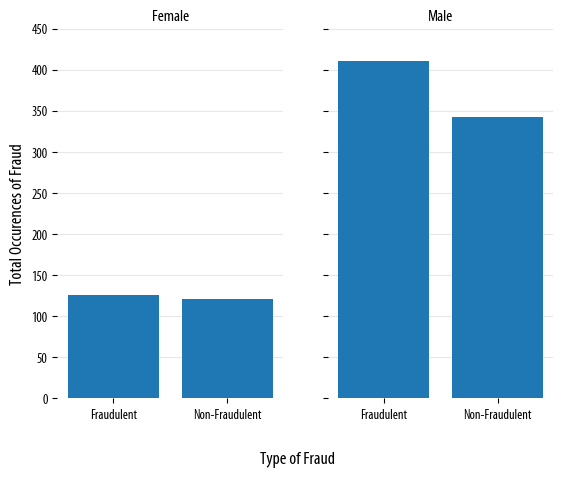

In [15]:
import matplotlib.pyplot as plt

x_axis = ['Fraudulent', 'Non-Fraudulent']
y_axis_1 = [126, 121]
y_axis_2 = [411, 342]

fig, (ax1, ax2) = plt.subplots(1, 2)

# Negative value is used to flip the title to the x-axis.
plt.suptitle("Type of Fraud", y = -0, fontsize = 13.0)

ax1.set_frame_on(False)
ax1.grid(axis = 'y', alpha = 0.3)
ax1.set(ylim=(0, 450))
ax1.set_ylabel('Total Occurences of Fraud', fontsize = 13.0)
ax1.title.set_text('Female')
ax1.bar(x_axis, y_axis_1)

ax2.set_frame_on(False)
ax2.set_yticklabels([])
ax2.grid(axis = 'y', alpha = 0.3)
ax2.set(ylim=(0, 450))
ax2.title.set_text('Male')
ax2.bar(x_axis, y_axis_2)

ax2.set_axisbelow(True) # Hides the x-axis grid lines.
ax1.set_axisbelow(True) # Hides the x-axis grid lines.


In [16]:
insurance_claims_df['insured_education_level']

0             MD
1             MD
2            PhD
3            PhD
4      Associate
         ...    
995      Masters
996          PhD
997      Masters
998    Associate
999    Associate
Name: insured_education_level, Length: 1000, dtype: object

In [17]:
education_levels = insurance_claims_df['insured_education_level'].unique()
education_levels

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [18]:
for education in education_levels:
  print(f"{education}: {(((insurance_claims_df['insured_education_level'] == education) & (insurance_claims_df['fraud_reported'] == 'Y')).sum())}")

MD: 38
PhD: 33
Associate: 34
Masters: 32
High School: 36
College: 32
JD: 42


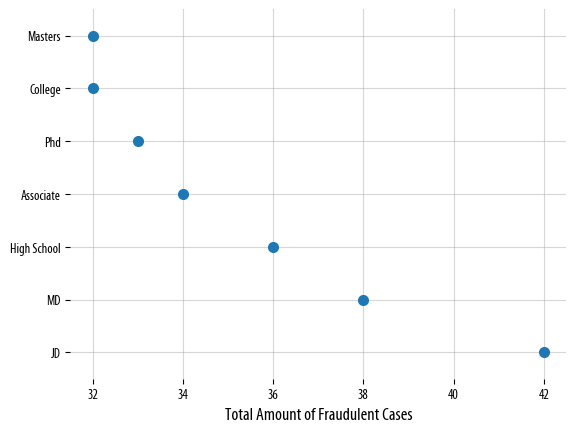

In [19]:
import seaborn as sns
import matplotlib

education_levels = {'MD' : 38,
                    'Phd' : 33,
                    'Associate' : 34,
                    'Masters' : 32,
                    'High School' : 36,
                    'College' : 32,
                    'JD' : 42}

sorted_ed_levels = dict(sorted(education_levels.items(), key=lambda x: x[1]))
ax = sns.stripplot(x = sorted_ed_levels.values(), y = sorted_ed_levels.keys(), size = 8)
plt.grid(axis = 'y', alpha = 0.5)
plt.grid(axis = 'x', alpha = 0.5)

ax.set_frame_on(False)
ax.set_xlabel("Total Amount of Fraudulent Cases", fontsize = 13.0)
matplotlib.rc('ytick', labelsize=11)


In [20]:
# States where incidents occured.
incident_states = insurance_claims_df['incident_state'].unique()

for state in incident_states:
  print(f"{state}: {((insurance_claims_df['incident_state'] == state)).sum()}")

SC: 248
VA: 110
NY: 262
OH: 23
WV: 217
NC: 110
PA: 30


In [21]:
# Severity of incidents and totals.
incident_severities = insurance_claims_df['incident_severity'].unique()

for severity in incident_severities:
  print(f"{severity}: {((insurance_claims_df['incident_severity'] == severity) & (insurance_claims_df['fraud_reported'] == 'Y')).sum()}")

Major Damage: 167
Minor Damage: 38
Total Loss: 36
Trivial Damage: 6


Text(0, 0.5, 'Total Number of Incidents')

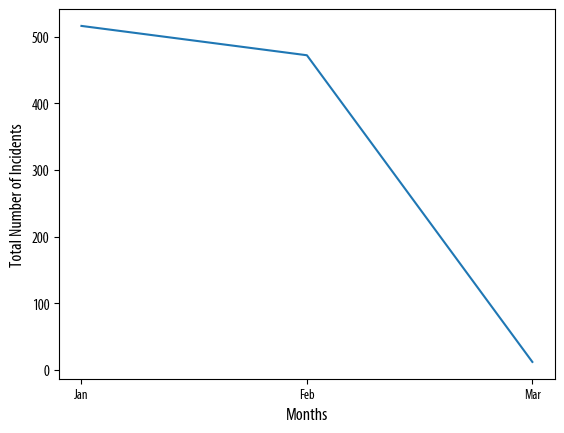

In [57]:
from collections import defaultdict
import matplotlib.pyplot as plt

incident_dates = insurance_claims_df['incident_date']

counter = defaultdict(int)
for incident_date in incident_dates:
  month = incident_date.split("-")[1]

  if month == "01":
    month = "Jan"
  elif month == "02":
    month = "Feb"
  elif month == "03":
    month = "Mar"

  counter[month] += 1

months, incident_freq = list(counter.keys()), list(counter.values())
plt.plot(months, incident_freq)
plt.xlabel("Months", fontsize = 13.0)
plt.ylabel("Total Number of Incidents", fontsize = 13.0)

In [102]:
# How much money is the insurance company losing and gaining?

print(f"""
        Total Capital Gains: ${insurance_claims_df['capital-gains'].sum()}
        Total Capital Loss ${insurance_claims_df['capital-loss'].sum()}
      """)


        Total Capital Gains: $25126100
        Total Capital Loss $-26793700
      


In [ ]:
# Looking at fraud based on how long the customer has been with the insurance company.
customer_senorities = insurance_claims_df['months_as_customer'].unique()

# Looks like there's no pattern.
for customer_senority in customer_senorities:
  print(f"{customer_senority}: {((insurance_claims_df['months_as_customer'] == customer_senority) & (insurance_claims_df['fraud_reported'] == 'Y')).sum()}")

328: 2
228: 1
134: 1
256: 2
137: 0
165: 0
27: 1
212: 0
235: 1
447: 0
60: 0
121: 2
180: 1
473: 1
70: 0
140: 3
160: 0
196: 1
460: 1
217: 0
370: 1
413: 1
237: 0
8: 1
257: 2
202: 1
224: 0
241: 0
64: 1
166: 1
155: 0
114: 0
149: 0
147: 3
62: 1
289: 1
431: 0
199: 2
79: 0
116: 2
37: 0
106: 0
269: 2
265: 0
163: 1
355: 1
175: 3
192: 0
430: 0
91: 0
223: 0
195: 1
22: 1
439: 0
94: 0
11: 1
151: 1
154: 2
245: 1
119: 2
215: 1
295: 1
254: 2
107: 2
478: 1
128: 2
338: 1
271: 2
222: 3
120: 0
270: 2
319: 0
194: 0
227: 1
244: 0
78: 1
200: 0
284: 1
275: 0
153: 0
31: 1
41: 1
127: 0
61: 3
207: 0
219: 0
80: 1
325: 1
29: 1
239: 1
279: 2
350: 0
464: 1
118: 0
298: 1
87: 1
261: 0
453: 1
210: 1
168: 1
390: 0
258: 2
225: 1
164: 0
255: 2
206: 2
203: 1
211: 1
274: 2
81: 2
280: 0
112: 1
24: 0
93: 0
171: 1
124: 0
287: 0
122: 0
398: 2
214: 1
209: 0
82: 1
193: 1
288: 0
104: 1
101: 1
375: 1
461: 0
428: 0
45: 0
136: 1
216: 1
278: 0
108: 1
14: 1
276: 1
47: 0
73: 0
294: 0
324: 0
53: 0
426: 0
111: 2
86: 1
296: 0
125: 1
177: 2
2

In [23]:
policy_states = insurance_claims_df['policy_state'].unique()

for state in policy_states:
  print(f"{state}: {((insurance_claims_df['policy_state'] == state) & (insurance_claims_df['fraud_reported'] == 'Y')).sum()}")

OH: 91
IN: 79
IL: 77


Text(0.5, 1.0, "Insurance Fraud Committed by Insured's Policy State")

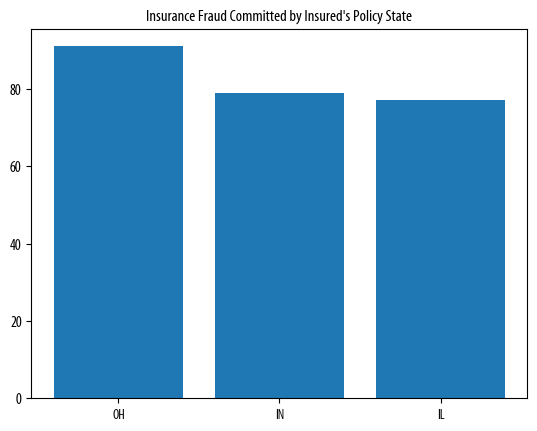

In [24]:
import matplotlib.pyplot as plt

y_axis = [91, 79, 77]

plt.bar(policy_states, y_axis)
plt.title("Insurance Fraud Committed by Insured's Policy State")

In [25]:
car_models = insurance_claims_df["auto_make"].unique()
car_models

# The car models Accura and Suburu are spelled wrong.
# It should be Acura and Subaru.

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [26]:
for car in car_models:
  print(f"{car}: {((insurance_claims_df['auto_make'] == car) & (insurance_claims_df['fraud_reported'] == 'Y')).sum()}")


Saab: 18
Mercedes: 22
Dodge: 20
Chevrolet: 21
Accura: 13
Nissan: 14
Audi: 21
Toyota: 13
Ford: 22
Suburu: 19
BMW: 20
Jeep: 11
Honda: 14
Volkswagen: 19


In [27]:
fraud_per_car = []
for car in car_models:
  fraud_per_car.append((((insurance_claims_df['auto_make'] == car) & (insurance_claims_df['fraud_reported'] == 'Y')).sum()))

In [28]:
car_models[4] = 'Acura'
car_models

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Acura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [29]:
car_models[-5] = 'Subaru'
car_models

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Acura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Subaru', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

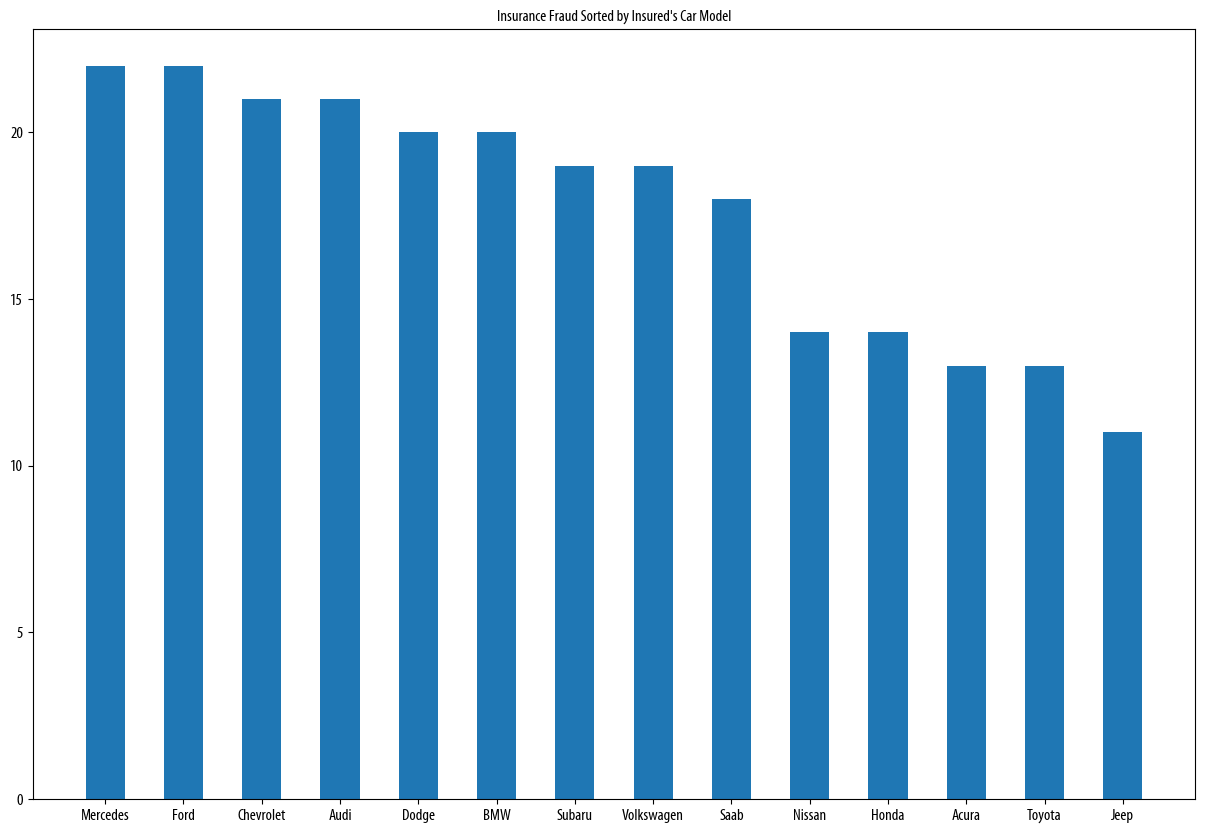

In [30]:
import matplotlib.pyplot as plt

df = pd.DataFrame(
   dict(
      vehicles=car_models,
      fraud=fraud_per_car
   )
)

plt.figure(figsize=(15,10))

df_sorted = df.sort_values('fraud', ascending=False)
plt.bar('vehicles', 'fraud', data=df_sorted, width=0.5)
#plt.bar(car_models, fraud_per_car, width = 0.5)
plt.title("Insurance Fraud Sorted by Insured's Car Model")
plt.tick_params(labelsize=12)

# Mercedes and Ford drivers have the highest number of cases of insurance fraud.

In [31]:
def dataframe_gen(gender: str, ages = insurance_claims_df['age'].unique()):
  fraud_per_age = []

  for age in ages:
    fraud_per_age.append(((insurance_claims_df['age'] == age) &
                          (insurance_claims_df['fraud_reported'] == 'Y') &
                          (insurance_claims_df['insured_sex'] == gender)).sum())

  df = pd.DataFrame(
    dict(
        age = ages,
        fraud_freq = fraud_per_age,
        gender = gender
    )
  )

  return df

df1 = dataframe_gen("MALE")
df2 = dataframe_gen("FEMALE")

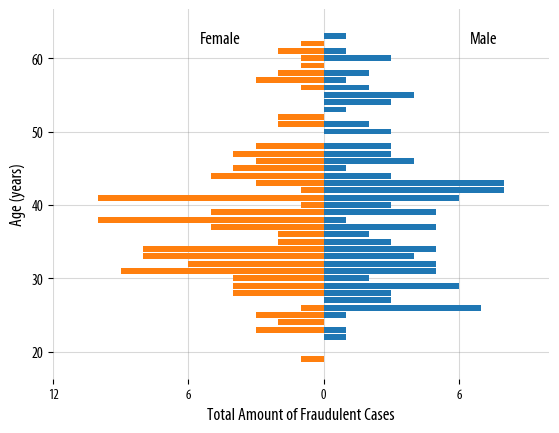

In [32]:
import matplotlib.pyplot as plt

plt.barh(width = df1["fraud_freq"], y = df1["age"], label = "Male")
plt.barh(width = df2["fraud_freq"], y = df2["age"], left = -df2["fraud_freq"], label = "Female")
plt.xlim(-df2["fraud_freq"].max(), df2["fraud_freq"].max())
plt.ylabel("Age (years)", fontsize = 13)
plt.xlabel("Total Amount of Fraudulent Cases", fontsize = 13)
plt.xticks(np.arange(-12, 12, 6), labels = [12, 6, 0, 6])
plt.text(-5.5, 62, "Female", fontsize = 13)
plt.text(6.5, 62, "Male", fontsize = 13)

ax = plt.gca()
ax.set_frame_on(False)
ax.set_axisbelow(True)
ax.grid(color='gray', alpha=0.3)

# Feature Selection using Seaborn


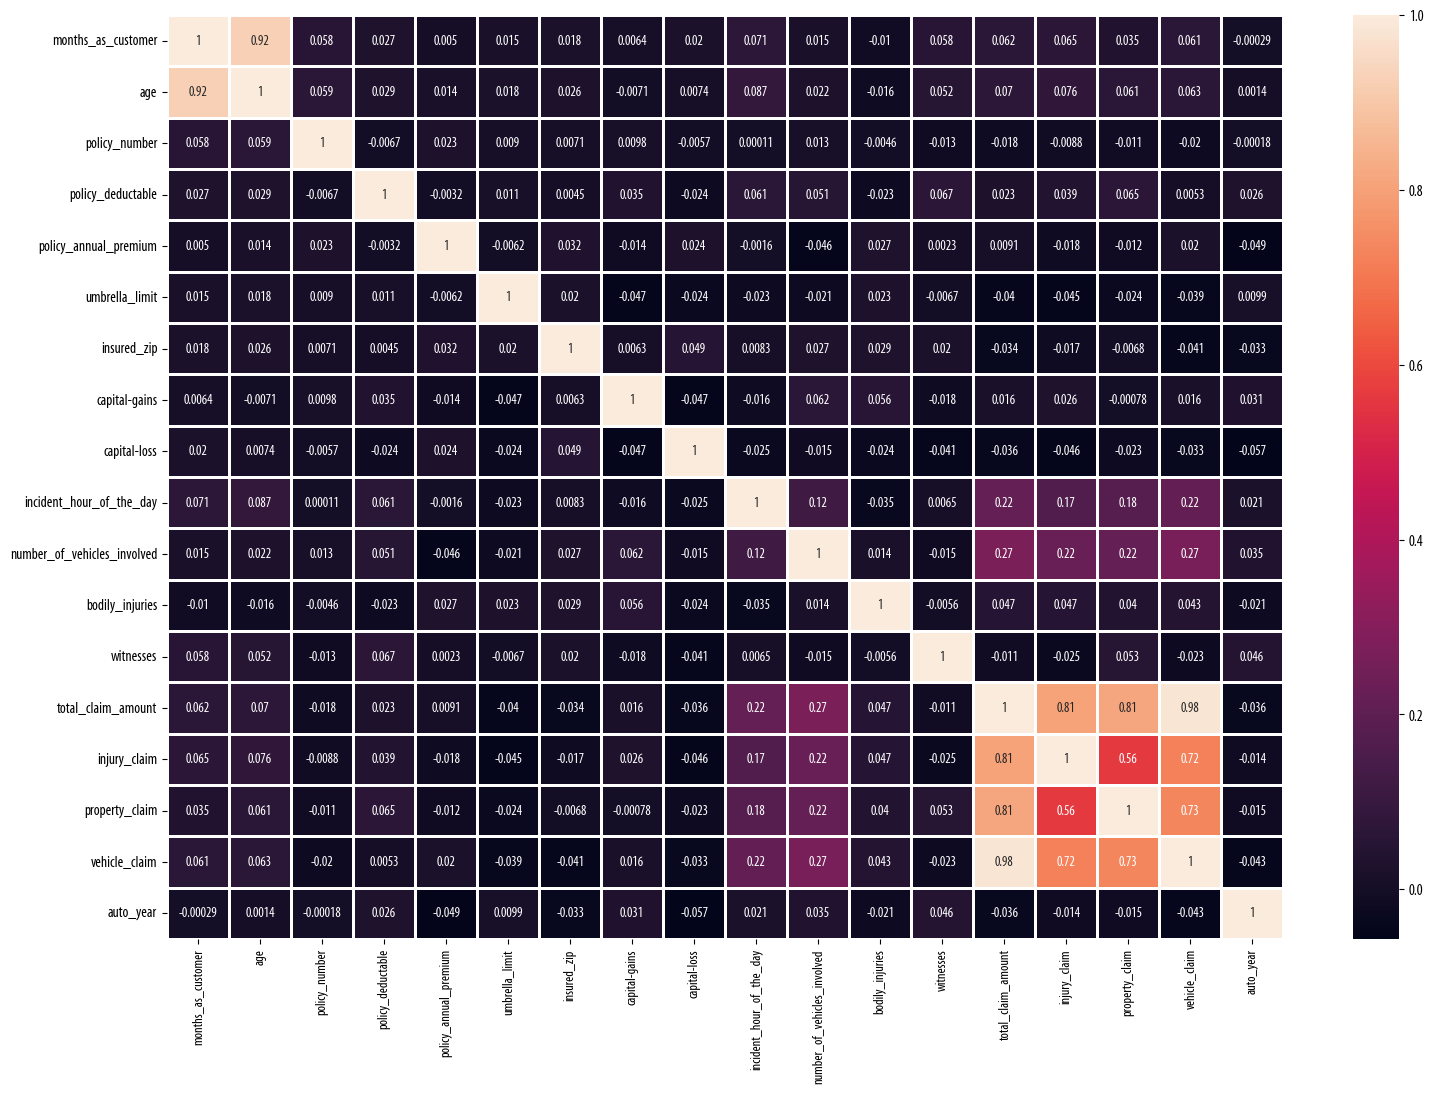

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 12))
correlation = insurance_claims_df.corr(numeric_only = True)
sns.heatmap(data=correlation, annot=True, fmt ='.2g', linewidth=2)
plt.show()


In [60]:
# I will now drop a few features--ones that are too complex to handle,
# and features that are highly correlated i.e. age and total_claim_amount.

drop = ['auto_make', 'auto_model', 'incident_city', 'incident_location', 'auto_year',
        'total_claim_amount', 'policy_state', 'age', 'policy_bind_date', 'incident_date',
        'incident_state', 'policy_number', 'insured_zip']
min_df = insurance_claims_df.copy()
min_df.drop(drop, inplace=True, axis=1)
min_df

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,...,20,1,NO,0,1,NO,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,unmarried,...,20,1,YES,0,1,NO,17440,8720,61040,N
996,285,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,wife,...,23,1,YES,2,3,NO,18080,18080,72320,N
997,130,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,...,4,3,NO,2,3,YES,7500,7500,52500,N
998,458,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,...,2,1,NO,0,1,YES,5220,5220,36540,N


In [61]:
_# Getting all the categorical columns.
cat_cols = min_df.select_dtypes(include=['object'])

for col in cat_cols:
  print(f"{col}: {cat_cols[col].unique()}")


policy_csl: ['250/500' '100/300' '500/1000']
insured_sex: ['MALE' 'FEMALE']
insured_education_level: ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_occupation: ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
insured_hobbies: ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
insured_relationship: ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
incident_type: ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
collision_type: ['Side Collision' 'Rear Collision' 'Front Collision']
incident_severity: ['Major Damage' 'Minor Damage' 'Total Loss' 'T

In [62]:
import pandas as pd

cat_cols = pd.get_dummies(cat_cols, drop_first=True)
cat_cols

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,fraud_reported_Y
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
4,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
997,1,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
998,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# Encoding Categorical Columns and Scaling Numerical Columns using Scikit-learn’s StandardScaler


In [63]:
from sklearn.preprocessing import StandardScaler

# Getting all the numerical columns.
num_cols = min_df.select_dtypes(include=['int64'])
num_cols
# Scaling all the numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_cols)

scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_cols.columns)
scaled_num_df


,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,1.078140,-0.222383,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,-0.189283,1.165505,0.749653
1,0.208995,1.412784,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.363822,-1.372696,-1.823346
2,-0.608002,1.412784,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,0.054644,-0.736072,-0.785565
3,0.452355,1.412784,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,-0.224130,-0.219722,0.677607
4,0.208995,-0.222383,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.257232,-1.399654,-1.768252
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.222383,-0.479476,-0.901927,0.953851,1.202666,-0.823865,-1.210174,-0.438431,2.051155,0.273817,1.224309
996,0.704407,-0.222383,-0.479476,1.643100,0.953851,1.634452,-0.823865,1.229693,1.362107,2.182342,2.214794,1.821868
997,-0.642767,-1.039966,0.826998,0.358023,0.953851,-1.100189,1.140056,1.229693,1.362107,0.013648,0.020826,0.771902
998,2.208028,1.412784,1.697980,-0.901927,0.953851,-1.388046,-0.823865,-1.210174,-0.438431,-0.453708,-0.451976,-0.073580


In [64]:
# Combining categorical and numerical columns

combined_df = pd.concat([scaled_num_df, cat_cols], axis=1)
combined_df

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,fraud_reported_Y
0,1.078140,-0.222383,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,-0.189283,...,0,0,0,0,0,0,1,1,1,1
1,0.208995,1.412784,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.363822,...,1,0,0,0,0,0,1,0,0,1
2,-0.608002,1.412784,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,0.054644,...,1,0,0,0,0,0,1,0,0,0
3,0.452355,1.412784,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,-0.224130,...,0,0,0,0,0,0,1,0,0,1
4,0.208995,-0.222383,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.257232,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.222383,-0.479476,-0.901927,0.953851,1.202666,-0.823865,-1.210174,-0.438431,2.051155,...,1,0,0,1,0,0,0,1,0,0
996,0.704407,-0.222383,-0.479476,1.643100,0.953851,1.634452,-0.823865,1.229693,1.362107,2.182342,...,0,0,0,1,0,0,0,1,0,0
997,-0.642767,-1.039966,0.826998,0.358023,0.953851,-1.100189,1.140056,1.229693,1.362107,0.013648,...,1,0,0,0,0,0,1,0,1,0
998,2.208028,1.412784,1.697980,-0.901927,0.953851,-1.388046,-0.823865,-1.210174,-0.438431,-0.453708,...,0,0,0,0,0,1,0,0,1,0


In [65]:
all_cols = list(combined_df.columns)

## Pair-plotting the Data

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:482: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)


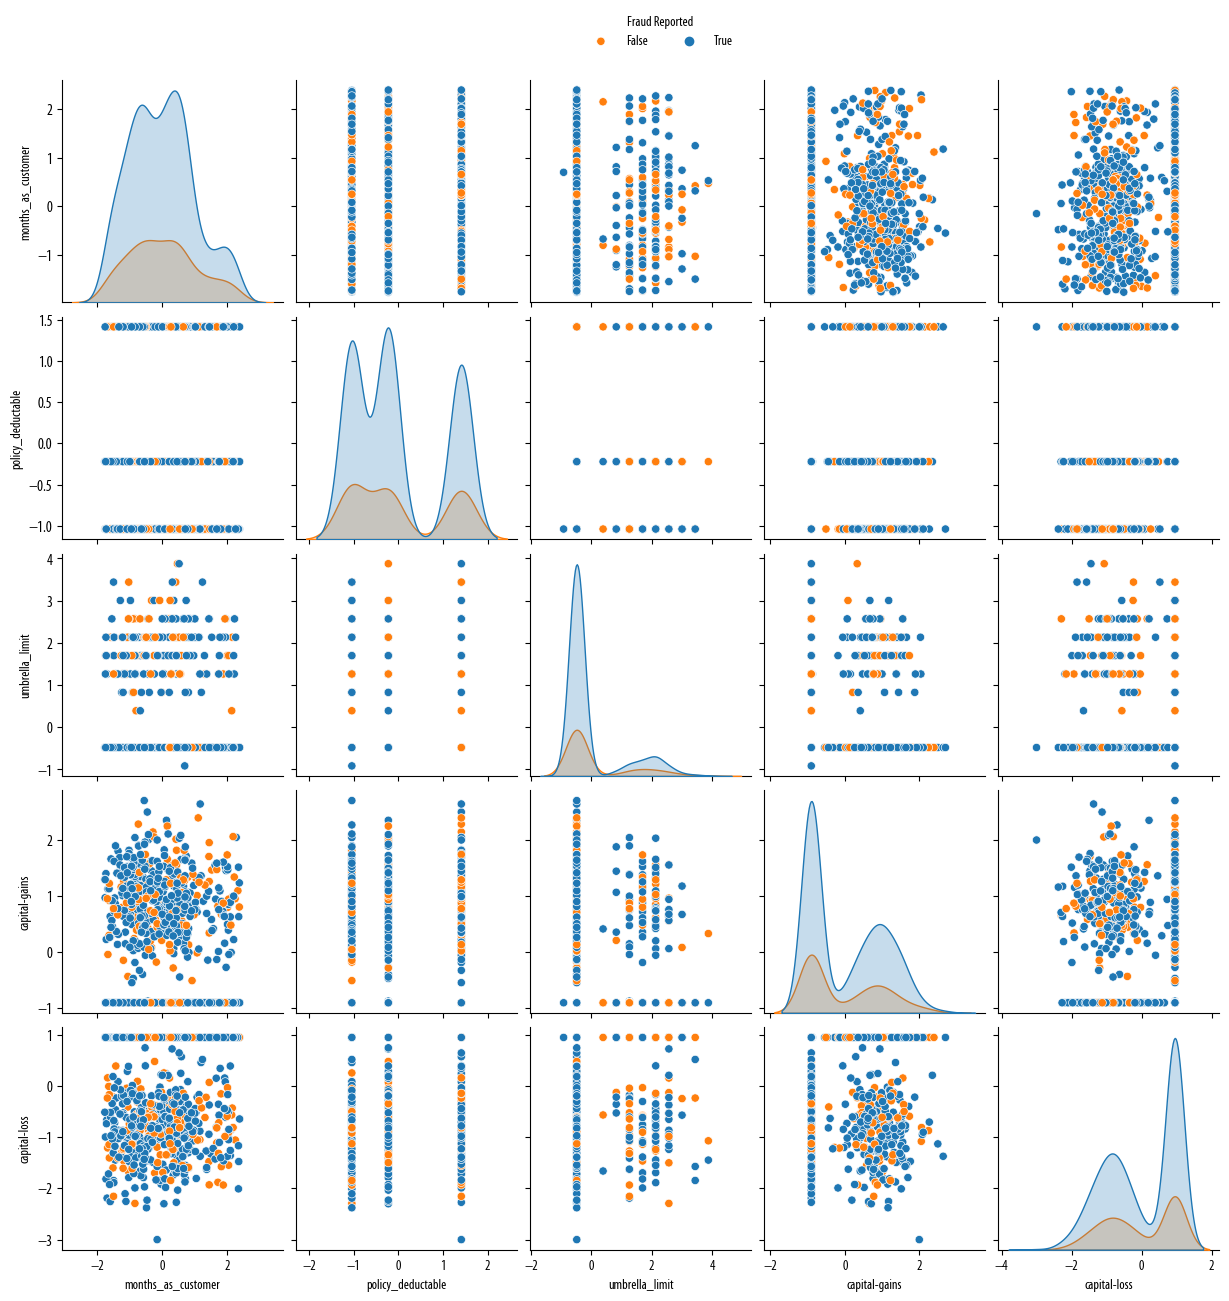

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.pairplot(combined_df, vars=all_cols[:5], hue='fraud_reported_Y')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title="Fraud Reported", frameon=False, labels=['False', 'True'],
)


## Train/Test Split

In [67]:
from sklearn.model_selection import train_test_split
import numpy as np

y = combined_df['fraud_reported_Y'].to_numpy()
X = combined_df.drop('fraud_reported_Y', axis=1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Fitting the SVM Model

In [68]:
from sklearn.svm import SVC

svc = SVC(gamma='scale', class_weight="balanced")
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"""Training accuracy of Support Vector Classifier is : {svc_train_acc}
Test accuracy of Support Vector Classifier is : {svc_test_acc}

Confusion Matrix
------------------
{confusion_matrix(y_test, y_pred)}

Classification Report
------------------
{classification_report(y_test, y_pred)}""")


Training accuracy of Support Vector Classifier is : 0.9428571428571428
Test accuracy of Support Vector Classifier is : 0.7933333333333333
      
Confusion Matrix
------------------
[[191  35]
 [ 27  47]]

Classification Report
------------------
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       226
           1       0.57      0.64      0.60        74

    accuracy                           0.79       300
   macro avg       0.72      0.74      0.73       300
weighted avg       0.80      0.79      0.80       300



In [91]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


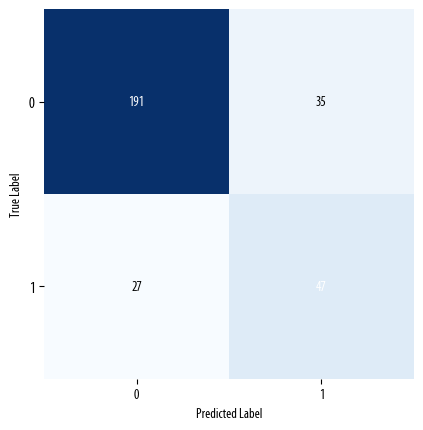

In [93]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), hide_spines = True)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

plt.show()


## Resampling using Adasyn

In [94]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)
print(f"X_res: {X_res.shape}, y_res: {y_res.shape}")

X_res: (1499, 72), y_res: (1499,)


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (1124, 72), X_test: (375, 72)
y_train: (1124,), y_test: (375,)


In [96]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"""Training accuracy of Support Vector Classifier is : {svc_train_acc}
Test accuracy of Support Vector Classifier is : {svc_test_acc}

Confusion Matrix
------------------
{confusion_matrix(y_test, y_pred)}

Classification Report
------------------
{classification_report(y_test, y_pred)}""")


Training accuracy of Support Vector Classifier is : 0.9733096085409253
Test accuracy of Support Vector Classifier is : 0.9173333333333333
      
Confusion Matrix
------------------
[[166  20]
 [ 11 178]]

Classification Report
------------------
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       186
           1       0.90      0.94      0.92       189

    accuracy                           0.92       375
   macro avg       0.92      0.92      0.92       375
weighted avg       0.92      0.92      0.92       375



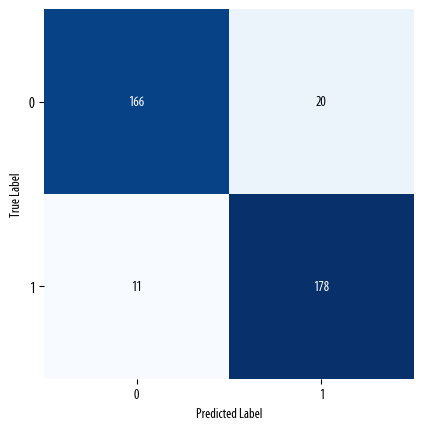

In [99]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), hide_spines = True)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

plt.show()

## Hyperparameter-Tuning using GridSearchCV

In [100]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train, y_train)

print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

In [101]:
grid_predictions = grid.predict(X_test)

print(f"""
Confusion Matrix
------------------
{confusion_matrix(y_test, grid_predictions)}

Classification Report
------------------
{classification_report(y_test, grid_predictions)}""")


Confusion Matrix
------------------
[[170  16]
 [ 10 179]]

Classification Report
------------------
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       186
           1       0.92      0.95      0.93       189

    accuracy                           0.93       375
   macro avg       0.93      0.93      0.93       375
weighted avg       0.93      0.93      0.93       375



#NaiveBayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nb_train_acc = accuracy_score(y_train, model.predict(X_train))
nb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Naive Bayes Classifier is : {nb_train_acc}")
print(f"Test accuracy of Naive Bayes Classifier is : {nb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Naive Bayes Classifier is : 0.7713523131672598
Test accuracy of Naive Bayes Classifier is : 0.9066666666666666
[[177  22]
 [ 13 163]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       199
           1       0.88      0.93      0.90       176

    accuracy                           0.91       375
   macro avg       0.91      0.91      0.91       375
weighted avg       0.91      0.91      0.91       375



# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_train_acc = accuracy_score(y_train, clf.predict(X_train))
dt_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree Classifier is : {dt_train_acc}")
print(f"Test accuracy of Decision Tree Classifier is : {dt_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree Classifier is : 1.0
Test accuracy of Decision Tree Classifier is : 0.8373333333333334
[[170  29]
 [ 32 144]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       199
           1       0.83      0.82      0.83       176

    accuracy                           0.84       375
   macro avg       0.84      0.84      0.84       375
weighted avg       0.84      0.84      0.84       375

